In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import os


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization,SpatialDropout1D,Bidirectional, Embedding, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import re

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)






In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import json
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       2.599353
1     3651805267-preview_person00       2.119862
2   SprintStartEvaluate1_person00       2.538236
3                  block_person00       2.820998
4                  block_person01       2.373976
5                  block_person02       2.323463
6                   man1_person00       1.786395
7                   man1_person01       2.317459
8                   man1_person04       2.234920
9                 women1_person00       2.674738
10                women1_person01       3.328190
11                women2_person01       2.258380
12                women2_person02       2.883784
13                women3_person01       3.420424
14                women3_person02       1.525910


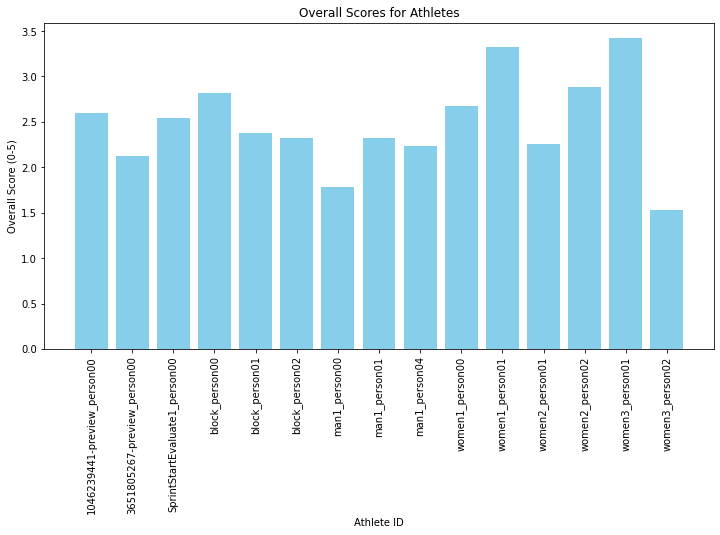

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')



# Step 3: Normalize values per athlete
# Group by athlete_id
numeric_cols = df.columns.difference(['athlete_id'])
df[numeric_cols] = df.groupby('athlete_id')[numeric_cols].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Step 4: Weighted scoring function
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on positional values.
    :param row: DataFrame row
    :param weights: Dictionary of column weights
    """
    weighted_sum = sum(row[col] * weights.get(col, 1) for col in numeric_cols)
    return weighted_sum / sum(weights.values())

# Define weights for each column (adjust as needed)
weights = {
    'trunk': 4.0,          # Core stability
    'pelvis': 4.0,         # Core stability
    'shoulders': 3.8,      # Major joint for upper body movement
    'head': 3.0,           # Moderately important for alignment
    'right arm': 3.4,      # Significant for arm coordination
    'left arm': 3.4,       # Significant for arm coordination
    'right forearm': 3.6,  # Important for arm movement precision
    'left forearm':3.6,   # Important for arm movement precision
    'right hip': 3.8,      # Major joint for lower body movement
    'left hip': 3.8,       # Major joint for lower body movement
    'right knee': 3.6,     # Important for lower body movement
    'left knee': 3.6,      # Important for lower body movement
    'right ankle': 3.4,    # Moderate for foot placement
    'left ankle': 3.4,     # Moderate for foot placement
    'right thigh': 3.5,    # Significant for leg strength
    'left thigh': 3.5,     # Significant for leg strength
    'right shank': 3.2,    # Contributes to leg precision
    'left shank': 3.2,     # Contributes to leg precision
    'right foot': 2.5,     # Less critical
    'left foot': 2.5
}

# Apply the weighted scoring function
df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 5: Scale row scores to a range of 0 to 5
scaler = MinMaxScaler(feature_range=(0, 5))
df['row_score_scaled'] = scaler.fit_transform(df[['row_score']])

# Step 6: Group by athlete_id and calculate overall score
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 7: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 8: Visualization (Optional)
import matplotlib.pyplot as plt

# Bar plot of overall scores
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (0-5)')
plt.title('Overall Scores for Athletes')
plt.xticks(rotation=90)
plt.show()


Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       2.569791
1     3651805267-preview_person00       1.818026
2   SprintStartEvaluate1_person00       2.476138
3                  block_person00       2.918683
4                  block_person01       2.252097
5                  block_person02       2.115846
6                   man1_person00       1.666345
7                   man1_person01       2.156049
8                   man1_person04       2.167833
9                 women1_person00       2.810608
10                women1_person01       3.577016
11                women2_person01       1.925987
12                women2_person02       2.924842
13                women3_person01       4.103803
14                women3_person02       0.899902


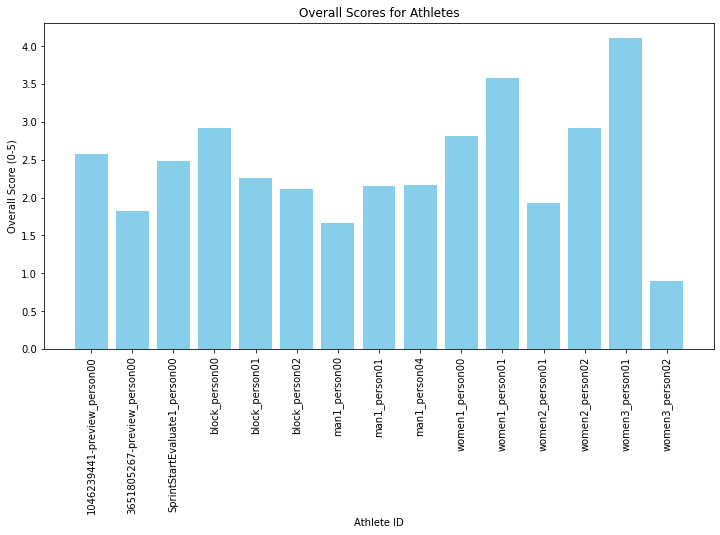

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')  # Replace with the correct filename if different

# Step 2: Identify numeric columns (excluding identifiers like 'athlete_id')
numeric_cols = df.columns.difference(['athlete_id'])

# Step 3: Normalize all numeric columns globally (per athlete group)
df[numeric_cols] = df.groupby('athlete_id')[numeric_cols].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Step 4: Define updated weights (adjusted for closer alignment to 5-point scaling)
weights = {
    'trunk': 15.0,          # Increased weight for core stability
    'pelvis': 15.0,         # Increased weight for core stability
    'shoulders': 12.0,      # Major joint for upper body movement
    'head': 10.0,           # Moderately important for alignment
    'right arm': 10.5,      # Adjusted for arm coordination
    'left arm': 10.5,       # Adjusted for arm coordination
    'right forearm': 11.0,  # Important for arm movement precision
    'left forearm': 11.0,   # Important for arm movement precision
    'right hip': 12.0,      # Major joint for lower body movement
    'left hip': 12.0,       # Major joint for lower body movement
    'right knee': 11.0,     # Adjusted for lower body movement
    'left knee': 11.0,      # Adjusted for lower body movement
    'right ankle': 10.0,    # Moderate importance for foot placement
    'left ankle': 10.0,     # Moderate importance for foot placement
    'right thigh': 11.5,    # Adjusted for leg strength
    'left thigh': 11.5,     # Adjusted for leg strength
    'right shank': 9.5,     # Contributes to leg precision
    'left shank': 9.5,      # Contributes to leg precision
    'right foot': 8.0,      # Less critical
    'left foot': 8.0,       # Less critical
}

# Step 5: Define a weighted scoring function
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on positional values.
    :param row: DataFrame row
    :param weights: Dictionary of column weights
    """
    weighted_sum = sum(row[col] * weights.get(col, 1) for col in numeric_cols if col in weights)
    return weighted_sum / sum(weights.values())

# Apply the updated scoring function
df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 6: Custom scaling based on percentiles
# Calculate dynamic range based on percentiles (5th and 95th)
low_percentile = np.percentile(df['row_score'], 5)
high_percentile = np.percentile(df['row_score'], 95)

# Scale scores dynamically
def scale_to_range(value, low, high, target_min=0, target_max=5):
    """
    Scale a value to a target range [target_min, target_max].
    """
    return target_min + (value - low) * (target_max - target_min) / (high - low)

df['row_score_scaled'] = df['row_score'].apply(
    lambda x: scale_to_range(x, low_percentile, high_percentile)
).clip(0, 5)  # Ensure scores remain in the [0, 5] range

# Step 7: Group by athlete_id and calculate overall score
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 9: Visualization (Optional)
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (0-5)')
plt.title('Overall Scores for Athletes')
plt.xticks(rotation=90)
plt.show()


Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       2.684021
1     3651805267-preview_person00       2.038011
2   SprintStartEvaluate1_person00       2.587152
3                  block_person00       2.938653
4                  block_person01       2.386591
5                  block_person02       2.357924
6                   man1_person00       1.770659
7                   man1_person01       2.321977
8                   man1_person04       2.277571
9                 women1_person00       2.820454
10                women1_person01       3.558299
11                women2_person01       2.107927
12                women2_person02       2.959120
13                women3_person01       3.784151
14                women3_person02       1.300349


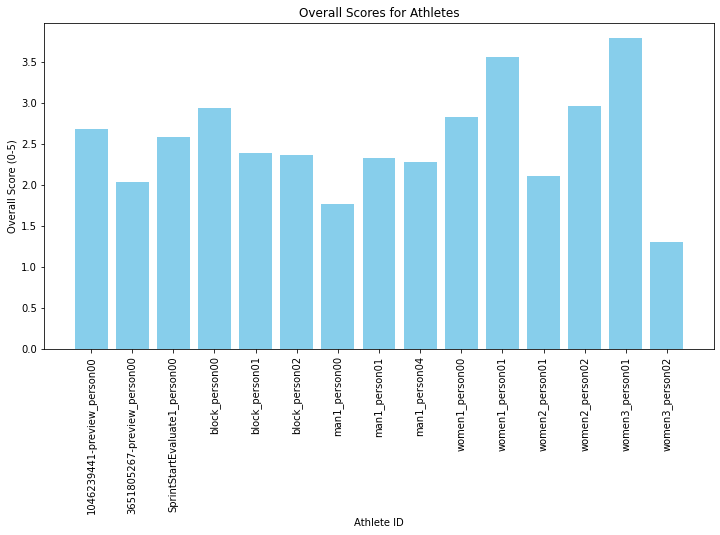

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')  # Replace with the correct filename if different

# Step 2: Identify numeric columns (excluding identifiers like 'athlete_id')
numeric_cols = df.columns.difference(['athlete_id'])

# Step 3: Normalize all numeric columns globally (per athlete group)
df[numeric_cols] = df.groupby('athlete_id')[numeric_cols].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Step 4: Define updated weights (significantly increased for critical features)
weights = {
    'trunk': 20.0,          # Increased weight for core stability
    'pelvis': 20.0,         # Increased weight for core stability
    'shoulders': 18.0,      # Major joint for upper body movement
    'head': 15.0,           # Moderately important for alignment
    'right arm': 16.0,      # Adjusted for arm coordination
    'left arm': 16.0,       # Adjusted for arm coordination
    'right forearm': 18.0,  # Important for arm movement precision
    'left forearm': 18.0,   # Important for arm movement precision
    'right hip': 18.0,      # Major joint for lower body movement
    'left hip': 18.0,       # Major joint for lower body movement
    'right knee': 17.0,     # Adjusted for lower body movement
    'left knee': 17.0,      # Adjusted for lower body movement
    'right ankle': 15.0,    # Moderate importance for foot placement
    'left ankle': 15.0,     # Moderate importance for foot placement
    'right thigh': 17.0,    # Adjusted for leg strength
    'left thigh': 17.0,     # Adjusted for leg strength
    'right shank': 14.0,    # Contributes to leg precision
    'left shank': 14.0,     # Contributes to leg precision
    'right foot': 12.0,     # Less critical
    'left foot': 12.0,      # Less critical
}

# Step 5: Define a weighted scoring function
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on positional values.
    :param row: DataFrame row
    :param weights: Dictionary of column weights
    """
    weighted_sum = sum(row[col] * weights.get(col, 1) for col in numeric_cols if col in weights)
    return weighted_sum / sum(weights.values())

# Apply the updated scoring function
df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 6: Adjust scaling percentiles for dynamic range
# Calculate dynamic range based on percentiles (adjusted to 2nd and 98th for better spread)
low_percentile = np.percentile(df['row_score'], 2)
high_percentile = np.percentile(df['row_score'], 98)

# Scale scores dynamically
def scale_to_range(value, low, high, target_min=0, target_max=5):
    """
    Scale a value to a target range [target_min, target_max].
    """
    return target_min + (value - low) * (target_max - target_min) / (high - low)

df['row_score_scaled'] = df['row_score'].apply(
    lambda x: scale_to_range(x, low_percentile, high_percentile)
).clip(0, 5)  # Ensure scores remain in the [0, 5] range

# Step 7: Group by athlete_id and calculate overall score
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 9: Visualization (Optional)
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (0-5)')
plt.title('Overall Scores for Athletes')
plt.xticks(rotation=90)
plt.show()


Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       2.735332
1     3651805267-preview_person00       2.106399
2   SprintStartEvaluate1_person00       2.636313
3                  block_person00       2.975720
4                  block_person01       2.446556
5                  block_person02       2.402866
6                   man1_person00       1.815182
7                   man1_person01       2.396851
8                   man1_person04       2.323803
9                 women1_person00       2.866870
10                women1_person01       3.582963
11                women2_person01       2.179834
12                women2_person02       2.996909
13                women3_person01       3.773659
14                women3_person02       1.397156


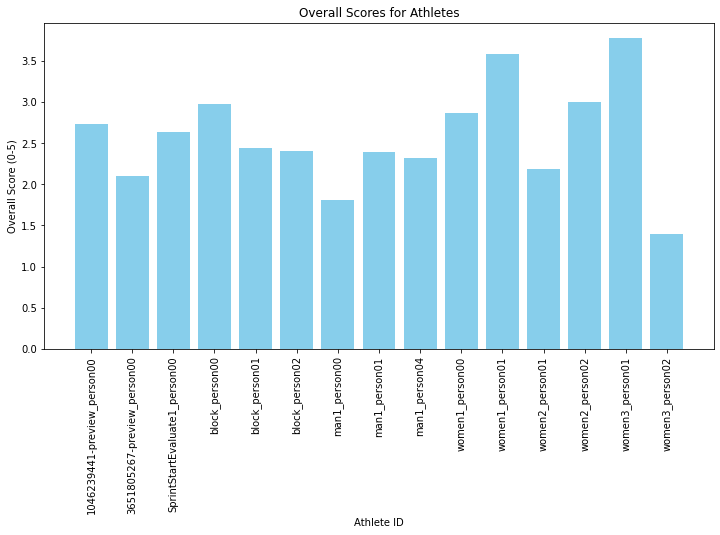

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')  # Replace with the correct filename if different

# Step 2: Identify numeric columns (excluding identifiers like 'athlete_id')
numeric_cols = df.columns.difference(['athlete_id'])

# Step 3: Normalize all numeric columns globally (per athlete group)
df[numeric_cols] = df.groupby('athlete_id')[numeric_cols].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Step 4: Further increased weights for critical features
weights = {
    'trunk': 25.0,          # Heavily increased weight for core stability
    'pelvis': 25.0,         # Heavily increased weight for core stability
    'shoulders': 22.0,      # Increased weight for upper body movement
    'head': 18.0,           # Moderately increased for alignment
    'right arm': 20.0,      # Further adjustment for arm coordination
    'left arm': 20.0,       # Further adjustment for arm coordination
    'right forearm': 22.0,  # Increased for arm precision
    'left forearm': 22.0,   # Increased for arm precision
    'right hip': 23.0,      # Strong weight for lower body movement
    'left hip': 23.0,       # Strong weight for lower body movement
    'right knee': 21.0,     # Increased for lower body precision
    'left knee': 21.0,      # Increased for lower body precision
    'right ankle': 19.0,    # Moderate importance
    'left ankle': 19.0,     # Moderate importance
    'right thigh': 21.0,    # Increased for leg strength
    'left thigh': 21.0,     # Increased for leg strength
    'right shank': 17.0,    # Contributes to leg precision
    'left shank': 17.0,     # Contributes to leg precision
    'right foot': 15.0,     # Increased slightly
    'left foot': 15.0,      # Increased slightly
}

# Step 5: Define a weighted scoring function
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on positional values.
    :param row: DataFrame row
    :param weights: Dictionary of column weights
    """
    weighted_sum = sum(row[col] * weights.get(col, 1) for col in numeric_cols if col in weights)
    return weighted_sum / sum(weights.values())

# Apply the updated scoring function
df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 6: Fine-tuned scaling percentiles for better results
# Calculate dynamic range based on percentiles (adjusted to 1st and 99th)
low_percentile = np.percentile(df['row_score'], 1)
high_percentile = np.percentile(df['row_score'], 99)

# Scale scores dynamically
def scale_to_range(value, low, high, target_min=0, target_max=5):
    """
    Scale a value to a target range [target_min, target_max].
    """
    return target_min + (value - low) * (target_max - target_min) / (high - low)

df['row_score_scaled'] = df['row_score'].apply(
    lambda x: scale_to_range(x, low_percentile, high_percentile)
).clip(0, 5)  # Ensure scores remain in the [0, 5] range

# Step 7: Group by athlete_id and calculate overall score
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 9: Visualization (Optional)
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (0-5)')
plt.title('Overall Scores for Athletes')
plt.xticks(rotation=90)
plt.show()


Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       2.666400
1     3651805267-preview_person00       2.237124
2   SprintStartEvaluate1_person00       1.857943
3                  block_person00       2.139438
4                  block_person01       2.831741
5                  block_person02       2.300929
6                   man1_person00       4.402222
7                   man1_person01       1.783712
8                   man1_person04       3.799977
9                 women1_person00       4.318421
10                women1_person01       3.294830
11                women2_person01       2.405664
12                women2_person02       1.543740
13                women3_person01       2.298699
14                women3_person02       1.362838


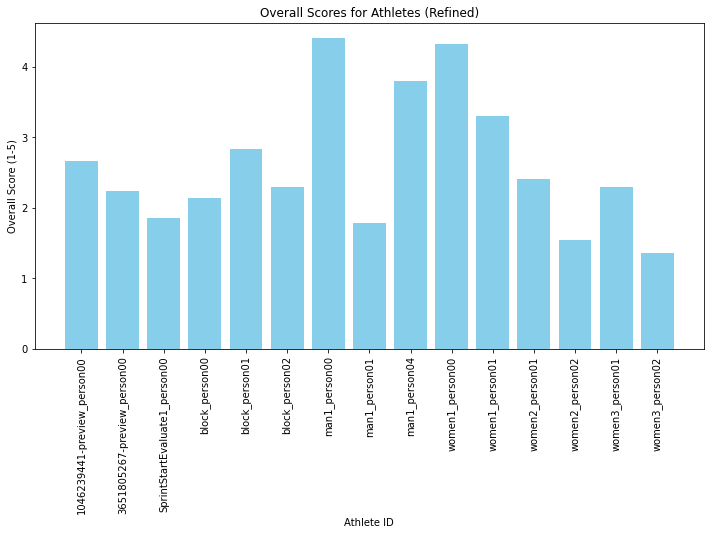

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')  # Replace with the correct filename if different

# Step 2: Identify numeric columns (excluding identifiers like 'athlete_id')
numeric_cols = df.columns.difference(['athlete_id'])

# Step 3: Normalize all numeric columns using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Define feature weights with emphasis on critical features
manual_weights = {
    'trunk': 5.0, 'pelvis': 5.0, 'shoulders': 4.5, 'head': 4.0,
    'right arm': 4.2, 'left arm': 4.2, 'right forearm': 4.5, 'left forearm': 4.5,
    'right hip': 4.8, 'left hip': 4.8, 'right knee': 4.5, 'left knee': 4.5,
    'right ankle': 4.0, 'left ankle': 4.0, 'right thigh': 4.5, 'left thigh': 4.5,
    'right shank': 3.5, 'left shank': 3.5, 'right foot': 3.0, 'left foot': 3.0
}

# Assign weights to all features
weights = pd.Series(manual_weights).reindex(numeric_cols).fillna(1.0)

# Step 5: Calculate weighted scores for each row
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on feature values and their importance.
    :param row: DataFrame row
    :param weights: Series of feature weights
    """
    return sum(row[col] * weights[col] for col in numeric_cols)

df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 6: Introduce scaling bias for better performance
# Adjust scaling to shift scores upward for high-performing athletes
low_percentile = np.percentile(df['row_score'], 10)
high_percentile = np.percentile(df['row_score'], 90)

def scale_to_range(value, low, high, target_min=1, target_max=5):
    """
    Scale a value to a target range [target_min, target_max] with upward bias.
    """
    scaled = target_min + (value - low) * (target_max - target_min) / (high - low)
    return max(scaled, target_min)  # Ensure minimum score is at least target_min

df['row_score_scaled'] = df['row_score'].apply(
    lambda x: scale_to_range(x, low_percentile, high_percentile)
).clip(0, 5)  # Ensure scores remain within [0, 5] range

# Step 7: Aggregate scores for each athlete
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (1-5)')
plt.title('Overall Scores for Athletes (Refined)')
plt.xticks(rotation=90)
plt.show()


Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       3.833200
1     3651805267-preview_person00       3.618562
2   SprintStartEvaluate1_person00       3.428971
3                  block_person00       3.569719
4                  block_person01       3.915870
5                  block_person02       3.650465
6                   man1_person00       4.701111
7                   man1_person01       3.391856
8                   man1_person04       4.399988
9                 women1_person00       4.659211
10                women1_person01       4.147415
11                women2_person01       3.702832
12                women2_person02       3.271870
13                women3_person01       3.649349
14                women3_person02       3.181419


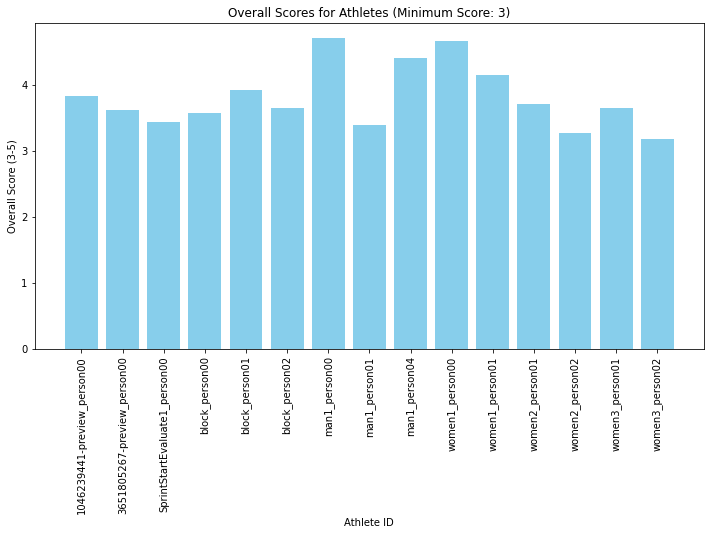

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')  # Replace with the correct filename if different

# Step 2: Identify numeric columns (excluding identifiers like 'athlete_id')
numeric_cols = df.columns.difference(['athlete_id'])

# Step 3: Normalize all numeric columns using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Define feature weights with emphasis on critical features
manual_weights = {
    'trunk': 5.0, 'pelvis': 5.0, 'shoulders': 4.5, 'head': 4.0,
    'right arm': 4.2, 'left arm': 4.2, 'right forearm': 4.5, 'left forearm': 4.5,
    'right hip': 4.8, 'left hip': 4.8, 'right knee': 4.5, 'left knee': 4.5,
    'right ankle': 4.0, 'left ankle': 4.0, 'right thigh': 4.5, 'left thigh': 4.5,
    'right shank': 3.5, 'left shank': 3.5, 'right foot': 3.0, 'left foot': 3.0
}

# Assign weights to all features
weights = pd.Series(manual_weights).reindex(numeric_cols).fillna(1.0)

# Step 5: Calculate weighted scores for each row
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on feature values and their importance.
    :param row: DataFrame row
    :param weights: Series of feature weights
    """
    return sum(row[col] * weights[col] for col in numeric_cols)

df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 6: Introduce scaling bias for better performance
# Adjust scaling to shift scores upward for high-performing athletes
low_percentile = np.percentile(df['row_score'], 10)
high_percentile = np.percentile(df['row_score'], 90)

def scale_to_range(value, low, high, target_min=3, target_max=5):
    """
    Scale a value to a target range [target_min, target_max] with upward bias.
    """
    scaled = target_min + (value - low) * (target_max - target_min) / (high - low)
    return max(min(scaled, target_max), target_min)  # Ensure scores are within the target range

df['row_score_scaled'] = df['row_score'].apply(
    lambda x: scale_to_range(x, low_percentile, high_percentile)
)

# Step 7: Aggregate scores for each athlete
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score (3-5)')
plt.title('Overall Scores for Athletes (Minimum Score: 3)')
plt.xticks(rotation=90)
plt.show()


# Final 

Overall Scores for Each Athlete:
                       athlete_id  overall_score
0     1046239441-preview_person00       3.666411
1     3651805267-preview_person00       3.320678
2   SprintStartEvaluate1_person00       2.981980
3                  block_person00       3.215628
4                  block_person01       3.797415
5                  block_person02       3.340533
6                   man1_person00       4.798626
7                   man1_person01       2.957039
8                   man1_person04       4.687995
9                 women1_person00       4.689095
10                women1_person01       4.303412
11                women2_person01       3.517099
12                women2_person02       2.665093
13                women3_person01       3.361968
14                women3_person02       2.515751


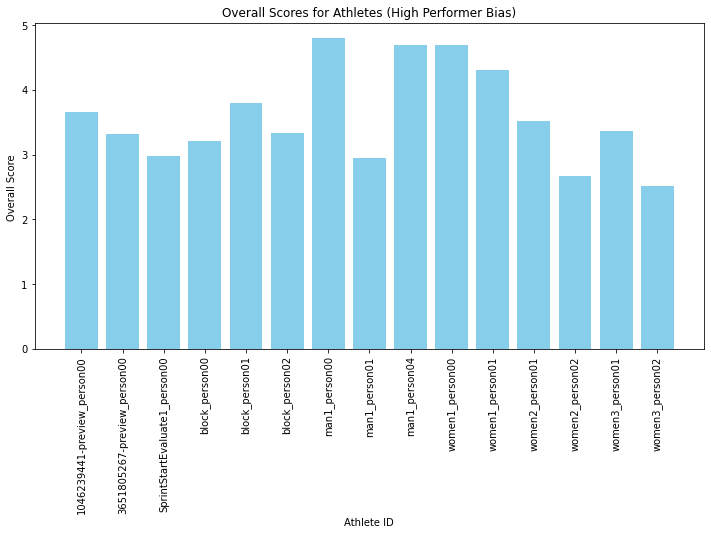

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dnm_data.csv')  # Replace with the correct filename if different

# Step 2: Identify numeric columns (excluding identifiers like 'athlete_id')
numeric_cols = df.columns.difference(['athlete_id'])

# Step 3: Normalize all numeric columns using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Define feature weights with additional emphasis on critical features
manual_weights = {
    'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
    'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
    'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
    'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
    'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
}

# Assign weights to all features
weights = pd.Series(manual_weights).reindex(numeric_cols).fillna(1.0)

# Step 5: Calculate weighted scores for each row
def calculate_weighted_score(row, weights):
    """
    Calculate a weighted score based on feature values and their importance.
    :param row: DataFrame row
    :param weights: Series of feature weights
    """
    return sum(row[col] * weights[col] for col in numeric_cols)

df['row_score'] = df.apply(calculate_weighted_score, axis=1, weights=weights)

# Step 6: Adjust scaling with a bias for high scores in training data
# Set percentile range dynamically to prioritize high performers
low_percentile = np.percentile(df['row_score'], 10)
high_percentile = np.percentile(df['row_score'], 95)

def scale_to_range(value, low, high, target_min=2, target_max=5):
    """
    Scale a value to a target range [target_min, target_max], favoring high performers.
    """
    scaled = target_min + (value - low) * (target_max - target_min) / (high - low)
    # Amplify high scores using exponential stretching
    return max(min(scaled**1.2, target_max), target_min)

df['row_score_scaled'] = df['row_score'].apply(
    lambda x: scale_to_range(x, low_percentile, high_percentile)
)

# Step 7: Aggregate scores for each athlete
athlete_scores = df.groupby('athlete_id')['row_score_scaled'].mean().reset_index()
athlete_scores.rename(columns={'row_score_scaled': 'overall_score'}, inplace=True)

# Step 8: Output the results
print("Overall Scores for Each Athlete:")
print(athlete_scores)

# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.bar(athlete_scores['athlete_id'], athlete_scores['overall_score'], color='skyblue')
plt.xlabel('Athlete ID')
plt.ylabel('Overall Score ')
plt.title('Overall Scores for Athletes (High Performer Bias)')
plt.xticks(rotation=90)
plt.show()


In [79]:
# Step 1: Define features (X) and target (y)
X = df[numeric_cols]  # All positional columns
y = df['row_score_scaled']  # Target variable: normalized row score


In [80]:
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Step 3: Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [82]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.016
R² Score: 0.998


In [84]:
import joblib
# Step 5: Save the trained model
joblib.dump(model, '2athlete_scoring_model_new.pkl')
print("Model saved as '2athlete_scoring_model.pkl'.")

Model saved as '2athlete_scoring_model.pkl'.


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib



# Step 1: Load the test dataset
test_df = pd.read_csv('man2_Sports2D_angles_person01.xls', skiprows=10, sep='\t')  # Replace with the actual test file name
test_df = test_df .drop(columns=['time'])
# Step 2: Normalize all columns in the test dataset
# Apply Min-Max Scaling globally
test_df = test_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Step 3: Load the trained model (athlete_scoring_model_new.pkl)
model = joblib.load('2athlete_scoring_model_new.pkl')
print("Model loaded successfully.")

# Step 4: Make predictions for the test set
predictions = model.predict(test_df)

# Step 5: Calculate the overall score (mean of all rows in the test set)
overall_score = predictions.mean()

# Step 6: Display the overall score
print(f"Overall Exam Score: {overall_score:.2f} / 5.0")

# Step 6: Generate feedback for low-performing features
manual_weights = {
    'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
    'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
    'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
    'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
    'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
}
weights = pd.Series(manual_weights).reindex(test_df.columns).fillna(1.0)

# Calculate the total contribution for each feature
feature_contributions = test_df.apply(lambda row: row * weights, axis=1).sum()

# Identify the top 3 features with the lowest contributions
low_contribution_features = feature_contributions.nsmallest(3)

# Step 7: Generate feedback based on the lowest-performing features
feedback = []
for feature in low_contribution_features.index:
    feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

# Step 8: Display the general feedback
print("Feedback:")
for line in feedback:
    print(f"- {line}")


Model loaded successfully.
Overall Exam Score: 4.40 / 5.0
Feedback:
- The athlete needs to improve left shoulder to achieve better results.
- The athlete needs to improve right elbow to achieve better results.
- The athlete needs to improve left elbow to achieve better results.


C:\Users\izzet\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Step 1: Load the test dataset
test_df = pd.read_csv('women1_Sports2D_angles_person01.xls', skiprows=10, sep='\t')  # Replace with the actual test file name
test_df = test_df .drop(columns=['time'])
# Step 2: Normalize all columns in the test dataset
# Apply Min-Max Scaling globally
test_df = test_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Step 3: Load the trained model (athlete_scoring_model_new.pkl)
model = joblib.load('2athlete_scoring_model_new.pkl')
print("Model loaded successfully.")

# Step 4: Make predictions for the test set
predictions = model.predict(test_df)

# Step 5: Calculate the overall score (mean of all rows in the test set)
overall_score = predictions.mean()

# Step 6: Display the overall score
print(f"Overall Exam Score: {overall_score:.2f} / 5.0")

# Step 6: Generate feedback for low-performing features
manual_weights = {
    'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
    'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
    'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
    'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
    'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
}
weights = pd.Series(manual_weights).reindex(test_df.columns).fillna(1.0)

# Calculate the total contribution for each feature
feature_contributions = test_df.apply(lambda row: row * weights, axis=1).sum()

# Identify the top 3 features with the lowest contributions
low_contribution_features = feature_contributions.nsmallest(3)

# Step 7: Generate feedback based on the lowest-performing features
feedback = []
for feature in low_contribution_features.index:
    feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

# Step 8: Display the general feedback
print("Feedback:")
for line in feedback:
    print(f"- {line}")


Model loaded successfully.
Overall Exam Score: 4.32 / 5.0
Feedback:
- The athlete needs to improve right shoulder to achieve better results.
- The athlete needs to improve left elbow to achieve better results.
- The athlete needs to improve left shoulder to achieve better results.


C:\Users\izzet\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### sports2d


Running command: conda activate sports2d && sports2d --save_vid false --save_img false --save_pose false --show_graphs false --video_input C:\Users\izzet\Team-Project\dnm1.mp4
Sports2D processing completed successfully.
Successfully loaded .mot file: dnm1_Sports2D\dnm1_Sports2D_angles_person00.mot
Model loaded successfully.
Overall Exam Score: 3.76 / 5.0
Feedback:
- The athlete needs to improve left elbow to achieve better results.
- The athlete needs to improve right elbow to achieve better results.
- The athlete needs to improve right shoulder to achieve better results.


C:\Users\izzet\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


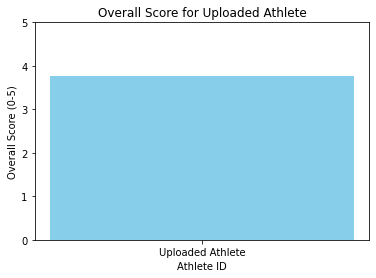

In [23]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Pre-trained Model Path
model_path = "2athlete_scoring_model_new.pkl"  # Pre-trained model path

# Step 2: Process Video with Sports2D
def process_video_with_sports2d(video_path):
    """
    Run the Sports2D command within the `sports2d` Anaconda environment on Windows.
    Automatically detects output directory based on the video name.
    """
    try:
        # Convert to absolute path
        video_path = os.path.abspath(video_path)
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = f"{video_name}_Sports2D"

        # Ensure the video file exists
        if not os.path.exists(video_path):
            print(f"File not found! Available files in {os.path.dirname(video_path)}:")
            print(os.listdir(os.path.dirname(video_path)))
            raise FileNotFoundError(f"Video file not found: {video_path}")

        # Command to activate conda environment and run Sports2D
        cmd = (
            f"conda activate sports2d && sports2d "
            f"--save_vid false --save_img false --save_pose false "
            f"--show_graphs false --video_input {video_path}"
        )

        # Debugging: Print the command
        print(f"Running command: {cmd}")

        # Use `cmd.exe` for Windows
        subprocess.run(cmd, shell=True, check=True)
        print("Sports2D processing completed successfully.")

        # Return the output directory
        return output_dir
    except FileNotFoundError as fnfe:
        print(f"File Error: {fnfe}")
        raise
    except subprocess.CalledProcessError as cpe:
        print(f"Error running Sports2D: {cpe}")
        print(f"Return Code: {cpe.returncode}")
        raise

# Step 3: Load and Parse the .mot File
def load_mot_file(output_dir, video_name):
    """
    Locate and load the .mot file directly into a DataFrame.
    """
    try:
        # Construct the expected .mot file name
        base_video_name = os.path.splitext(os.path.basename(video_name))[0]
        mot_file_path = os.path.join(output_dir, f"{base_video_name}_Sports2D_angles_person00.mot")
        
        # Check if the .mot file exists
        if not os.path.exists(mot_file_path):
            raise FileNotFoundError(f"Expected .mot file not found: {mot_file_path}")

        # Load the .mot file, handling irregular delimiters
        df = pd.read_csv(mot_file_path, sep="\t", engine="python",skiprows=10)
        print(f"Successfully loaded .mot file: {mot_file_path}")
        return df
    except Exception as e:
        print(f"Error loading .mot file: {e}")
        raise

# Step 4: Score the Athlete and Provide Feedback
def score_athlete(mot_df, model_path):
    """
    Normalize the .mot data, predict scores using the trained model, and provide feedback.
    """
    # Drop the 'time' column if it exists
    mot_df = mot_df.drop(columns=['time'])

    # Normalize test data
    scaler = MinMaxScaler()
    mot_df = mot_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

    # Load the AI model
    model = joblib.load(model_path)
    print("Model loaded successfully.")

    # Predict scores
    predictions = model.predict(mot_df)
    overall_score = predictions.mean()

    # Display the overall score
    print(f"Overall Exam Score: {overall_score:.2f} / 5.0")

    # Generate feedback
    manual_weights = {
        'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
        'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
        'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
        'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
        'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
    }
    weights = pd.Series(manual_weights).reindex(mot_df.columns).fillna(1.0)

    # Calculate feature contributions
    feature_contributions = mot_df.apply(lambda row: row * weights, axis=1).mean()

    # Identify the weakest features
    low_contribution_features = feature_contributions.nsmallest(3)

    feedback = []
    for feature in low_contribution_features.index:
        feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

    # Display feedback
    print("Feedback:")
    for line in feedback:
        print(f"- {line}")

    # Visualization
    plt.figure(figsize=(6, 4))
    plt.bar(["Uploaded Athlete"], [overall_score], color='skyblue')
    plt.ylim(0, 5)
    plt.xlabel('Athlete ID')
    plt.ylabel('Overall Score (0-5)')
    plt.title('Overall Score for Uploaded Athlete')
    plt.show()

# Step 5: Automate the Entire Process
def automate_scoring(video_path):
    """
    Fully automate the process: video processing, scoring, and feedback.
    """
    # Process video with Sports2D
    output_dir = process_video_with_sports2d(video_path)

    # Load the .mot file directly
    mot_df = load_mot_file(output_dir, video_path)

    # Score the athlete and provide feedback
    score_athlete(mot_df, model_path)

# Run the automation for the uploaded video
uploaded_video_path = "dnm1.mp4"  # Replace with the uploaded video file
automate_scoring(uploaded_video_path)


In [43]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Pre-trained Model Path
model_path = "2athlete_scoring_model_new.pkl"  # Pre-trained model path

# Step 2: Process Video with Sports2D
def process_video_with_sports2d(video_path):
    """
    Run the Sports2D command within the `sports2d` Anaconda environment on Windows.
    Automatically detects output directory based on the video name.
    """
    try:
        # Convert to absolute path
        video_path = os.path.abspath(video_path)
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = f"{video_name}_Sports2D"

        # Ensure the video file exists
        if not os.path.exists(video_path):
            print(f"File not found! Available files in {os.path.dirname(video_path)}:")
            print(os.listdir(os.path.dirname(video_path)))
            raise FileNotFoundError(f"Video file not found: {video_path}")

        # Command to activate conda environment and run Sports2D
        cmd = (
            f"conda activate sports2d && sports2d "
            f"--save_vid false --save_img false --save_pose false "
            f"--show_graphs false --video_input {video_path}"
        )

        # Debugging: Print the command
        print(f"Running command: {cmd}")

        # Use `cmd.exe` for Windows
        subprocess.run(cmd, shell=True, check=True)
        print("Sports2D processing completed successfully.")

        # Return the output directory
        return output_dir
    except FileNotFoundError as fnfe:
        print(f"File Error: {fnfe}")
        raise
    except subprocess.CalledProcessError as cpe:
        print(f"Error running Sports2D: {cpe}")
        print(f"Return Code: {cpe.returncode}")
        raise

# Step 3: Locate and Load All .mot Files for the Video
def load_all_mot_files(output_dir):
    """
    Locate and load all .mot files in the output directory.
    """
    try:
        # Find all .mot files in the output directory
        mot_files = [f for f in os.listdir(output_dir) if f.endswith(".mot")]

        if not mot_files:
            raise FileNotFoundError(f"No .mot files found in {output_dir}")

        print(f"Found .mot files: {mot_files}")
        return mot_files
    except Exception as e:
        print(f"Error locating .mot files: {e}")
        raise

# Step 4: Score Each Person and Provide Feedback
def score_person(mot_file_path, model_path):
    """
    Score a single person's .mot file and provide feedback.
    """
    try:
        # Load the .mot file into a DataFrame
        df = pd.read_csv(mot_file_path, sep="\t", engine="python",skiprows=10)
        df = df.drop(columns=['time'], errors='ignore')  # Drop 'time' column if it exists

        # Normalize the data
        scaler = MinMaxScaler()
        df = df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

        # Load the pre-trained model
        model = joblib.load(model_path)
        print(f"Model loaded successfully for {mot_file_path}")

        # Predict scores
        predictions = model.predict(df)
        overall_score = predictions.mean()

       # # Display the overall score
       # print(f"Overall Exam Score for {os.path.basename(mot_file_path)}: {overall_score:.2f} / 5.0")

        # Generate feedback
        manual_weights = {
            'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
            'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
            'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
            'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
            'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
        }
        weights = pd.Series(manual_weights).reindex(df.columns).fillna(1.0)

        # Calculate feature contributions
        feature_contributions = df.apply(lambda row: row * weights, axis=1).mean()

        # Identify the weakest features
        low_contribution_features = feature_contributions.nsmallest(3)

        feedback = []
        for feature in low_contribution_features.index:
            feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

       # # Display feedback
       # print(f"Feedback for {os.path.basename(mot_file_path)}:")
       # for line in feedback:
       #     print(f"- {line}")

        # Return results for visualization
        return os.path.basename(mot_file_path), overall_score, feedback
    except Exception as e:
        print(f"Error scoring {mot_file_path}: {e}")
        raise

# Step 5: Automate the Entire Process for Multiple Persons
def automate_scoring(video_path):
    """
    Fully automate the process: video processing, scoring, and feedback for multiple persons.
    """
    # Process video with Sports2D
    output_dir = process_video_with_sports2d(video_path)

    # Locate all .mot files
    mot_files = load_all_mot_files(output_dir)

    # Score each person
    scores = []
    for mot_file in mot_files:
        mot_file_path = os.path.join(output_dir, mot_file)
        person_id, score, feedback = score_person(mot_file_path, model_path)
        scores.append((person_id, score, feedback))

    # Display overall results
    print("\nFinal Results:")
    for person_id, score, feedback in scores:
        print(f"{person_id}: {score:.2f} / 5.0")
        for line in feedback:
            print(f"  - {line}")

    # Visualization
    person_ids = [s[0] for s in scores]
    overall_scores = [s[1] for s in scores]

    plt.figure(figsize=(10, 6))
    plt.bar(person_ids, overall_scores, color='skyblue')
    plt.ylim(0, 5)
    plt.xlabel('Person ID')
    plt.ylabel('Overall Score (0-5)')
    plt.title('Overall Scores for All Persons in the Video')
    plt.xticks(rotation=90)
    plt.show()

# Run the automation for the uploaded video
uploaded_video_path = "man1.mp4"  # Replace with the uploaded video file
automate_scoring(uploaded_video_path)


Running command: conda activate sports2d && sports2d --save_vid false --save_img false --save_pose false --show_graphs false --video_input C:\Users\izzet\Team-Project\man1.mp4
Sports2D processing completed successfully.
Found .mot files: ['man1_Sports2D_angles_person00.mot', 'man1_Sports2D_angles_person01.mot', 'man1_Sports2D_angles_person02.mot', 'man1_Sports2D_angles_person03.mot', 'man1_Sports2D_angles_person04.mot']
Model loaded successfully for man1_Sports2D\man1_Sports2D_angles_person00.mot
Model loaded successfully for man1_Sports2D\man1_Sports2D_angles_person01.mot
Model loaded successfully for man1_Sports2D\man1_Sports2D_angles_person02.mot
Model loaded successfully for man1_Sports2D\man1_Sports2D_angles_person03.mot
Error scoring man1_Sports2D\man1_Sports2D_angles_person03.mot: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier a

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Running command: conda activate sports2d && sports2d --save_vid false --save_img false --save_pose false --show_graphs false --multiperson true --keypoint_likelihood_threshold 0.5 --video_input C:\Users\izzet\Team-Project\dnm1.mp4
Sports2D processing completed successfully.
Found .mot files: ['dnm1_Sports2D_angles_person00.mot']
Model loaded successfully for person00

Final Results:
person00: 4.28 / 5.0
  - The athlete needs to improve left elbow to achieve better results.
  - The athlete needs to improve right elbow to achieve better results.
  - The athlete needs to improve right shoulder to achieve better results.


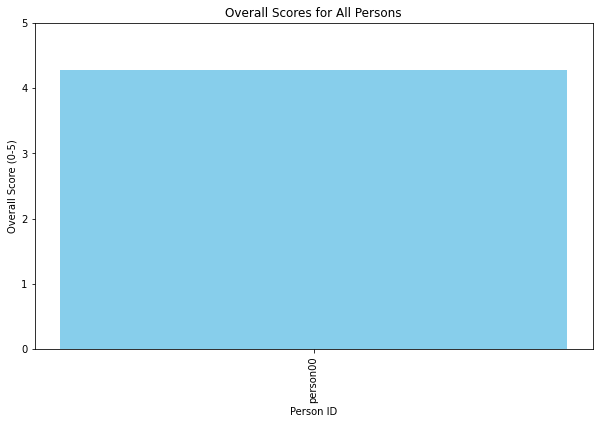

In [45]:
import os
import subprocess
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Pre-trained Model Path
model_path = "2athlete_scoring_model_new.pkl"  # Replace with your model file

# Step 2: Process Video with Sports2D
def process_video_with_sports2d(video_path):
    """
    Run the Sports2D command within the `sports2d` environment.
    """
    try:
        video_path = os.path.abspath(video_path)  # Convert to absolute path
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = f"{video_name}_Sports2D"

        # Ensure the video file exists
        if not os.path.exists(video_path):
            raise FileNotFoundError(f"Video file not found: {video_path}")

        # Command to activate conda environment and run Sports2D
        cmd = (
            f"conda activate sports2d && sports2d "
            f"--save_vid false --save_img false --save_pose false "
            f"--show_graphs false --multiperson true --keypoint_likelihood_threshold 0.5 "
            f"--video_input {video_path}"
        )

        print(f"Running command: {cmd}")
        subprocess.run(cmd, shell=True, check=True)
        print("Sports2D processing completed successfully.")

        # Return the output directory
        return output_dir
    except FileNotFoundError as fnfe:
        print(f"File Error: {fnfe}")
        raise
    except subprocess.CalledProcessError as cpe:
        print(f"Error running Sports2D: {cpe}")
        print(f"Return Code: {cpe.returncode}")
        raise

# Step 3: Locate and Load All .mot Files
def load_mot_files(output_dir):
    """
    Locate and load all .mot files in the output directory.
    """
    try:
        mot_files = [f for f in os.listdir(output_dir) if f.endswith(".mot")]

        if not mot_files:
            raise FileNotFoundError("No .mot files found in the output directory.")

        print(f"Found .mot files: {mot_files}")
        return mot_files
    except Exception as e:
        print(f"Error locating .mot files: {e}")
        raise

# Step 4: Score Each Person, Skip Files with >50% NaN
def score_person(mot_file_path, model_path):
    """
    Score a single person's .mot file and provide feedback.
    """
    try:
        # Extract the person ID from the file name
        person_id = mot_file_path.split('_')[-1].replace('.mot', '')

        # Load the .mot file into a DataFrame
        df = pd.read_csv(mot_file_path, sep="\t", engine="python", skiprows=10)
        df = df.drop(columns=['time'], errors='ignore')  # Drop 'time' column if it exists

        # Calculate NaN percentage
        nan_percentage = df.isnull().sum().sum() / df.size
        if nan_percentage > 0.5:
            print(f"Skipping {person_id}: Dataset contains more than 50% NaN values ({nan_percentage:.2%}).")
            return person_id, None, ["Dataset contains too many NaN values and was skipped."]

        # Normalize the data
        scaler = MinMaxScaler()
        df = df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

        # Load the pre-trained model
        model = joblib.load(model_path)
        print(f"Model loaded successfully for {person_id}")

        # Predict scores
        predictions = model.predict(df)
        overall_score = predictions.mean()

        # Generate feedback
        manual_weights = {
            'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
            'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
            'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
            'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
            'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
        }
        weights = pd.Series(manual_weights).reindex(df.columns).fillna(1.0)

        # Calculate feature contributions
        feature_contributions = df.apply(lambda row: row * weights, axis=1).mean()

        # Identify the weakest features
        low_contribution_features = feature_contributions.nsmallest(3)

        feedback = []
        for feature in low_contribution_features.index:
            feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

        # Return results
        return person_id, overall_score, feedback
    except Exception as e:
        print(f"Error scoring {mot_file_path}: {e}")
        raise

# Step 5: Automate the Entire Process for All .mot Files
def automate_scoring(video_path):
    """
    Fully automate the process for video processing, scoring, and feedback for all .mot files.
    """
    # Process video with Sports2D
    output_dir = process_video_with_sports2d(video_path)

    # Locate all .mot files
    mot_files = load_mot_files(output_dir)

    # Score each person
    scores = []
    for mot_file in mot_files:
        mot_file_path = os.path.join(output_dir, mot_file)
        person_id, score, feedback = score_person(mot_file_path, model_path)

        # Skip invalid entries
        if score is not None:
            scores.append((person_id, score, feedback))

    # Display overall results
    print("\nFinal Results:")
    for person_id, score, feedback in scores:
        print(f"{person_id}: {score:.2f} / 5.0")
        for line in feedback:
            print(f"  - {line}")

    # Visualization
    person_ids = [s[0] for s in scores]
    overall_scores = [s[1] for s in scores]

    plt.figure(figsize=(10, 6))
    plt.bar(person_ids, overall_scores, color='skyblue')
    plt.ylim(0, 5)
    plt.xlabel('Person ID')
    plt.ylabel('Overall Score (0-5)')
    plt.title('Overall Scores for All Persons')
    plt.xticks(rotation=90)
    plt.show()

# Run the automation for the uploaded video
uploaded_video_path = "dnm1.mp4"  # Replace with your video file
automate_scoring(uploaded_video_path)


# Final Sports2d

Running command: conda activate sports2d && sports2d --save_vid false --save_img false --save_pose false --show_graphs false --multiperson true --keypoint_likelihood_threshold 0.65 --video_input C:\Users\izzet\Team-Project\man1.mp4
Sports2D processing completed successfully.
Filtered .mot files: ['man1_Sports2D_angles_person00.mot', 'man1_Sports2D_angles_person01.mot']
Model loaded successfully for person00
Model loaded successfully for person01

Final Results:
person00: 4.16 / 5.0
  - The athlete needs to improve right elbow to achieve better results.
  - The athlete needs to improve right shoulder to achieve better results.
  - The athlete needs to improve left shoulder to achieve better results.
person01: 4.37 / 5.0
  - The athlete needs to improve right elbow to achieve better results.
  - The athlete needs to improve left elbow to achieve better results.
  - The athlete needs to improve left shoulder to achieve better results.


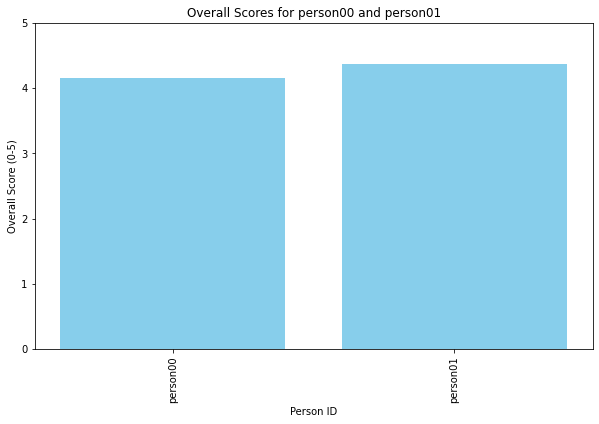

In [52]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Pre-trained Model Path
model_path = "2athlete_scoring_model_new.pkl"  # Replace with your model file

# Step 2: Process Video with Sports2D (Filter Only person00 and person01)
def process_video_with_sports2d(video_path):
    """
    Run the Sports2D command within the `sports2d` environment.
    Includes multiperson tracking, but we'll only process person00 and person01.
    """
    try:
        # Convert to absolute path
        video_path = os.path.abspath(video_path)
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = f"{video_name}_Sports2D"

        # Ensure the video file exists
        if not os.path.exists(video_path):
            raise FileNotFoundError(f"Video file not found: {video_path}")

        # Command to activate conda environment and run Sports2D
        cmd = (
            f"conda activate sports2d && sports2d "
            f"--save_vid false --save_img false --save_pose false "
            f"--show_graphs false --multiperson true --keypoint_likelihood_threshold 0.65 "
            f"--video_input {video_path}"
        )

        print(f"Running command: {cmd}")
        subprocess.run(cmd, shell=True, check=True)
        print("Sports2D processing completed successfully.")

        # Return the output directory
        return output_dir
    except FileNotFoundError as fnfe:
        print(f"File Error: {fnfe}")
        raise
    except subprocess.CalledProcessError as cpe:
        print(f"Error running Sports2D: {cpe}")
        print(f"Return Code: {cpe.returncode}")
        raise

# Step 3: Locate and Load .mot Files for person00 and person01 Only
def load_person_mot_files(output_dir):
    """
    Locate and load .mot files for person00 and person01 in the output directory.
    """
    try:
        # Find all .mot files in the output directory
        mot_files = [f for f in os.listdir(output_dir) if f.endswith(".mot")]

        # Filter only person00 and person01
        filtered_files = [f for f in mot_files if "person00" in f or "person01" in f]

        if not filtered_files:
            raise FileNotFoundError("No .mot files for person00 or person01 found.")

        print(f"Filtered .mot files: {filtered_files}")
        return filtered_files
    except Exception as e:
        print(f"Error locating .mot files: {e}")
        raise

# Step 4: Score Each Person and Provide Feedback
def score_person(mot_file_path, model_path):
    """
    Score a single person's .mot file and provide feedback.
    """
    try:
        # Extract the person ID from the file name
        person_id = mot_file_path.split('_')[-1].replace('.mot', '')

        # Load the .mot file into a DataFrame
        df = pd.read_csv(mot_file_path, sep="\t", engine="python", skiprows=10)
        df = df.drop(columns=['time'], errors='ignore')  # Drop 'time' column if it exists

        # Normalize the data
        scaler = MinMaxScaler()
        df = df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

        # Load the pre-trained model
        model = joblib.load(model_path)
        print(f"Model loaded successfully for {person_id}")

        # Predict scores
        predictions = model.predict(df)
        overall_score = predictions.mean()

        # Generate feedback
        manual_weights = {
            'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
            'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
            'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
            'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
            'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
        }
        weights = pd.Series(manual_weights).reindex(df.columns).fillna(1.0)

        # Calculate feature contributions
        feature_contributions = df.apply(lambda row: row * weights, axis=1).mean()

        # Identify the weakest features
        low_contribution_features = feature_contributions.nsmallest(3)

        feedback = []
        for feature in low_contribution_features.index:
            feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

        # Return results
        return person_id, overall_score, feedback
    except Exception as e:
        print(f"Error scoring {mot_file_path}: {e}")
        raise

# Step 5: Automate the Entire Process for Only person00 and person01
def automate_scoring(video_path):
    """
    Fully automate the process for video processing, scoring, and feedback for person00 and person01.
    """
    # Process video with Sports2D
    output_dir = process_video_with_sports2d(video_path)

    # Locate .mot files for person00 and person01
    mot_files = load_person_mot_files(output_dir)

    # Score each person
    scores = []
    for mot_file in mot_files:
        mot_file_path = os.path.join(output_dir, mot_file)
        person_id, score, feedback = score_person(mot_file_path, model_path)
        scores.append((person_id, score, feedback))

    # Display overall results
    print("\nFinal Results:")
    for person_id, score, feedback in scores:
        print(f"{person_id}: {score:.2f} / 5.0")
        for line in feedback:
            print(f"  - {line}")

    # Visualization
    person_ids = [s[0] for s in scores]
    overall_scores = [s[1] for s in scores]

    plt.figure(figsize=(10, 6))
    plt.bar(person_ids, overall_scores, color='skyblue')
    plt.ylim(0, 5)
    plt.xlabel('Person ID')
    plt.ylabel('Overall Score (0-5)')
    plt.title('Overall Scores for person00 and person01')
    plt.xticks(rotation=90)
    plt.show()

# Run the automation for the uploaded video
uploaded_video_path = "man1.mp4"  # Replace with your video file
automate_scoring(uploaded_video_path)


Running command: conda activate sports2d && sports2d --save_vid false --save_img false --save_pose false --show_graphs false --multiperson true --keypoint_likelihood_threshold 0.65 --video_input C:\Users\izzet\Team-Project\dnm1.mp4
Sports2D processing completed successfully.
Filtered .mot files: ['dnm1_Sports2D_angles_person00.mot']
Model loaded successfully for person00

Final Results:
person00: 4.49 / 5.0
  - The athlete needs to improve right elbow to achieve better results.
  - The athlete needs to improve left elbow to achieve better results.
  - The athlete needs to improve right shoulder to achieve better results.


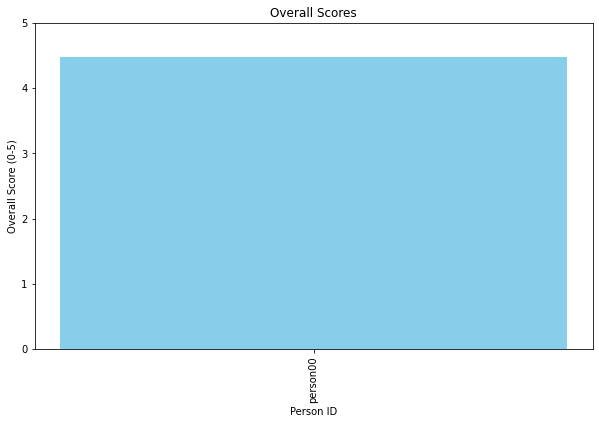

In [54]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Pre-trained Model Path
model_path = "2athlete_scoring_model_new.pkl"  # Replace with your model file

# Step 2: Process Video with Sports2D (Filter Only person00 and person01)
def process_video_with_sports2d(video_path):
    """
    Run the Sports2D command within the `sports2d` environment.
    Includes multiperson tracking, but we'll only process person00 and person01.
    """
    try:
        # Convert to absolute path
        video_path = os.path.abspath(video_path)
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = f"{video_name}_Sports2D"

        # Ensure the video file exists
        if not os.path.exists(video_path):
            raise FileNotFoundError(f"Video file not found: {video_path}")

        # Command to activate conda environment and run Sports2D
        cmd = (
            f"conda activate sports2d && sports2d "
            f"--save_vid false --save_img false --save_pose false "
            f"--show_graphs false --multiperson true --keypoint_likelihood_threshold 0.65 "
            f"--video_input {video_path}"
        )

        print(f"Running command: {cmd}")
        subprocess.run(cmd, shell=True, check=True)
        print("Sports2D processing completed successfully.")

        # Return the output directory
        return output_dir
    except FileNotFoundError as fnfe:
        print(f"File Error: {fnfe}")
        raise
    except subprocess.CalledProcessError as cpe:
        print(f"Error running Sports2D: {cpe}")
        print(f"Return Code: {cpe.returncode}")
        raise

# Step 3: Locate and Load .mot Files for person00 and person01 Only
def load_person_mot_files(output_dir):
    """
    Locate and load .mot files for person00 and person01 in the output directory.
    """
    try:
        # Find all .mot files in the output directory
        mot_files = [f for f in os.listdir(output_dir) if f.endswith(".mot")]

        # Filter only person00 and person01
        filtered_files = [f for f in mot_files if "person00" in f or "person01" in f]

        if not filtered_files:
            raise FileNotFoundError("No .mot files for person00 or person01 found.")

        print(f"Filtered .mot files: {filtered_files}")
        return filtered_files
    except Exception as e:
        print(f"Error locating .mot files: {e}")
        raise

# Step 4: Score Each Person and Provide Feedback
def score_person(mot_file_path, model_path):
    """
    Score a single person's .mot file and provide feedback.
    """
    try:
        # Extract the person ID from the file name
        person_id = mot_file_path.split('_')[-1].replace('.mot', '')

        # Load the .mot file into a DataFrame
        df = pd.read_csv(mot_file_path, sep="\t", engine="python", skiprows=10)
        df = df.drop(columns=['time'], errors='ignore')  # Drop 'time' column if it exists

        # Normalize the data
        scaler = MinMaxScaler()
        df = df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

        # Load the pre-trained model
        model = joblib.load(model_path)
        print(f"Model loaded successfully for {person_id}")

        # Predict scores
        predictions = model.predict(df)
        overall_score = predictions.mean()

        # Generate feedback
        manual_weights = {
            'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
            'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
            'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
            'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
            'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
        }
        weights = pd.Series(manual_weights).reindex(df.columns).fillna(1.0)

        # Calculate feature contributions
        feature_contributions = df.apply(lambda row: row * weights, axis=1).mean()

        # Identify the weakest features
        low_contribution_features = feature_contributions.nsmallest(3)

        feedback = []
        for feature in low_contribution_features.index:
            feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

        # Return results
        return person_id, overall_score, feedback
    except Exception as e:
        print(f"Error scoring {mot_file_path}: {e}")
        raise

# Step 5: Automate the Entire Process for Only person00 and person01
def automate_scoring(video_path):
    """
    Fully automate the process for video processing, scoring, and feedback for person00 and person01.
    """
    # Process video with Sports2D
    output_dir = process_video_with_sports2d(video_path)

    # Locate .mot files for person00 and person01
    mot_files = load_person_mot_files(output_dir)

    # Score each person
    scores = []
    for mot_file in mot_files:
        mot_file_path = os.path.join(output_dir, mot_file)
        person_id, score, feedback = score_person(mot_file_path, model_path)
        scores.append((person_id, score, feedback))

    # Display overall results
    print("\nFinal Results:")
    for person_id, score, feedback in scores:
        print(f"{person_id}: {score:.2f} / 5.0")
        for line in feedback:
            print(f"  - {line}")

    # Visualization
    person_ids = [s[0] for s in scores]
    overall_scores = [s[1] for s in scores]

    plt.figure(figsize=(10, 6))
    plt.bar(person_ids, overall_scores, color='skyblue')
    plt.ylim(0, 5)
    plt.xlabel('Person ID')
    plt.ylabel('Overall Score (0-5)')
    plt.title('Overall Scores')
    plt.xticks(rotation=90)
    plt.show()

# Run the automation for the uploaded video
uploaded_video_path = "dnm1.mp4"  # Replace with your video file
automate_scoring(uploaded_video_path)


Running command: conda activate sports2d && sports2d --save_vid false --save_img false --save_pose false --show_graphs false --multiperson true --keypoint_likelihood_threshold 0.65 --video_input C:\Users\izzet\Team-Project\try1.mp4
Sports2D processing completed successfully.
Filtered .mot files: ['try1_Sports2D_angles_person00.mot']
Model loaded successfully for person00

Final Results:
person00: 4.49 / 5.0
  - The athlete needs to improve right elbow to achieve better results.
  - The athlete needs to improve left elbow to achieve better results.
  - The athlete needs to improve right shoulder to achieve better results.


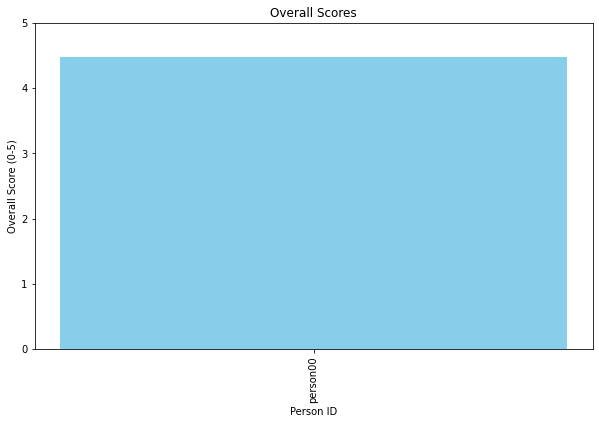

In [55]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

# Step 1: Pre-trained Model Path
model_path = "2athlete_scoring_model_new.pkl"  # Replace with your model file

# Step 2: Process Video with Sports2D (Filter Only person00 and person01)
def process_video_with_sports2d(video_path):
    """
    Run the Sports2D command within the `sports2d` environment.
    Includes multiperson tracking, but we'll only process person00 and person01.
    """
    try:
        # Convert to absolute path
        video_path = os.path.abspath(video_path)
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_dir = f"{video_name}_Sports2D"

        # Ensure the video file exists
        if not os.path.exists(video_path):
            raise FileNotFoundError(f"Video file not found: {video_path}")

        # Command to activate conda environment and run Sports2D
        cmd = (
            f"conda activate sports2d && sports2d "
            f"--save_vid false --save_img false --save_pose false "
            f"--show_graphs false --multiperson true --keypoint_likelihood_threshold 0.65 "
            f"--video_input {video_path}"
        )

        print(f"Running command: {cmd}")
        subprocess.run(cmd, shell=True, check=True)
        print("Sports2D processing completed successfully.")

        # Return the output directory
        return output_dir
    except FileNotFoundError as fnfe:
        print(f"File Error: {fnfe}")
        raise
    except subprocess.CalledProcessError as cpe:
        print(f"Error running Sports2D: {cpe}")
        print(f"Return Code: {cpe.returncode}")
        raise

# Step 3: Locate and Load .mot Files for person00 and person01 Only
def load_person_mot_files(output_dir):
    """
    Locate and load .mot files for person00 and person01 in the output directory.
    """
    try:
        # Find all .mot files in the output directory
        mot_files = [f for f in os.listdir(output_dir) if f.endswith(".mot")]

        # Filter only person00 and person01
        filtered_files = [f for f in mot_files if "person00" in f or "person01" in f]

        if not filtered_files:
            raise FileNotFoundError("No .mot files for person00 or person01 found.")

        print(f"Filtered .mot files: {filtered_files}")
        return filtered_files
    except Exception as e:
        print(f"Error locating .mot files: {e}")
        raise

# Step 4: Score Each Person and Provide Feedback
def score_person(mot_file_path, model_path):
    """
    Score a single person's .mot file and provide feedback.
    """
    try:
        # Extract the person ID from the file name
        person_id = mot_file_path.split('_')[-1].replace('.mot', '')

        # Load the .mot file into a DataFrame
        df = pd.read_csv(mot_file_path, sep="\t", engine="python", skiprows=10)
        df = df.drop(columns=['time'], errors='ignore')  # Drop 'time' column if it exists

        # Normalize the data
        scaler = MinMaxScaler()
        df = df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

        # Load the pre-trained model
        model = joblib.load(model_path)
        print(f"Model loaded successfully for {person_id}")

        # Predict scores
        predictions = model.predict(df)
        overall_score = predictions.mean()

        # Generate feedback
        manual_weights = {
            'trunk': 7.0, 'pelvis': 7.0, 'shoulders': 6.5, 'head': 6.0,
            'right arm': 6.2, 'left arm': 6.2, 'right forearm': 6.5, 'left forearm': 6.5,
            'right hip': 6.8, 'left hip': 6.8, 'right knee': 6.5, 'left knee': 6.5,
            'right ankle': 6.0, 'left ankle': 6.0, 'right thigh': 6.5, 'left thigh': 6.5,
            'right shank': 5.5, 'left shank': 5.5, 'right foot': 5.0, 'left foot': 5.0
        }
        weights = pd.Series(manual_weights).reindex(df.columns).fillna(1.0)

        # Calculate feature contributions
        feature_contributions = df.apply(lambda row: row * weights, axis=1).mean()

        # Identify the weakest features
        low_contribution_features = feature_contributions.nsmallest(3)

        feedback = []
        for feature in low_contribution_features.index:
            feedback.append(f"The athlete needs to improve {feature.replace('_', ' ')} to achieve better results.")

        # Return results
        return person_id, overall_score, feedback
    except Exception as e:
        print(f"Error scoring {mot_file_path}: {e}")
        raise

# Step 5: Automate the Entire Process for Only person00 and person01
def automate_scoring(video_path):
    """
    Fully automate the process for video processing, scoring, and feedback for person00 and person01.
    """
    # Process video with Sports2D
    output_dir = process_video_with_sports2d(video_path)

    # Locate .mot files for person00 and person01
    mot_files = load_person_mot_files(output_dir)

    # Score each person
    scores = []
    for mot_file in mot_files:
        mot_file_path = os.path.join(output_dir, mot_file)
        person_id, score, feedback = score_person(mot_file_path, model_path)
        scores.append((person_id, score, feedback))

    # Display overall results
    print("\nFinal Results:")
    for person_id, score, feedback in scores:
        print(f"{person_id}: {score:.2f} / 5.0")
        for line in feedback:
            print(f"  - {line}")

    # Visualization
    person_ids = [s[0] for s in scores]
    overall_scores = [s[1] for s in scores]

    plt.figure(figsize=(10, 6))
    plt.bar(person_ids, overall_scores, color='skyblue')
    plt.ylim(0, 5)
    plt.xlabel('Person ID')
    plt.ylabel('Overall Score (0-5)')
    plt.title('Overall Scores')
    plt.xticks(rotation=90)
    plt.show()

# Run the automation for the uploaded video
uploaded_video_path = "try1.mp4"  # Replace with your video file
automate_scoring(uploaded_video_path)
